#**Proyecto 1 - Parte 5**
Seguiremos trabajando en tu proyecto de predicción de ventas. El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y puntos de venta que juegan un papel crucial en el aumento de las ventas.

Para la Parte 5, tu tarea es usar Regresión lineal o KNN (¡o ambos!) Para crear un modelo para predecir las ventas:
* La columna "Item_Outlet_Sales" es tu objetivo. 
* Construye un modelo para predecir esto.
* Evalúa tu modelo.
* ¿Hay algo que puedas hacer para mejorar el modelo?
* ¿Qué características están más asociadas con la predicción de ventas mayores?

Registra tu trabajo en GitHub.
¡Entrega un enlace a tu repositorio de GitHub! Finalizaremos el proyecto la semana que viene.

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Para escalar datos
from sklearn.preprocessing import StandardScaler
# Regresión KNN
from sklearn.neighbors import KNeighborsRegressor
# Regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [4]:
# Importar una librería
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Cargar la data
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/PTCienciaDeDatos/PandasParaManipulaciónDeDatos/sales_predictions.csv')

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Sabemos que en la data original existe missing values por lo que se imputan las observaciones faltantes

In [7]:
# Imputacion de datos faltantes
#df['Outlet_Size']=df.fillna(df.mode().iloc[0])
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
#Se lleno los vacios con la moda
df['Item_Weight']=df['Item_Weight'].interpolate(method = 'linear')
#Se hizo una interpolacion lineal

In [8]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


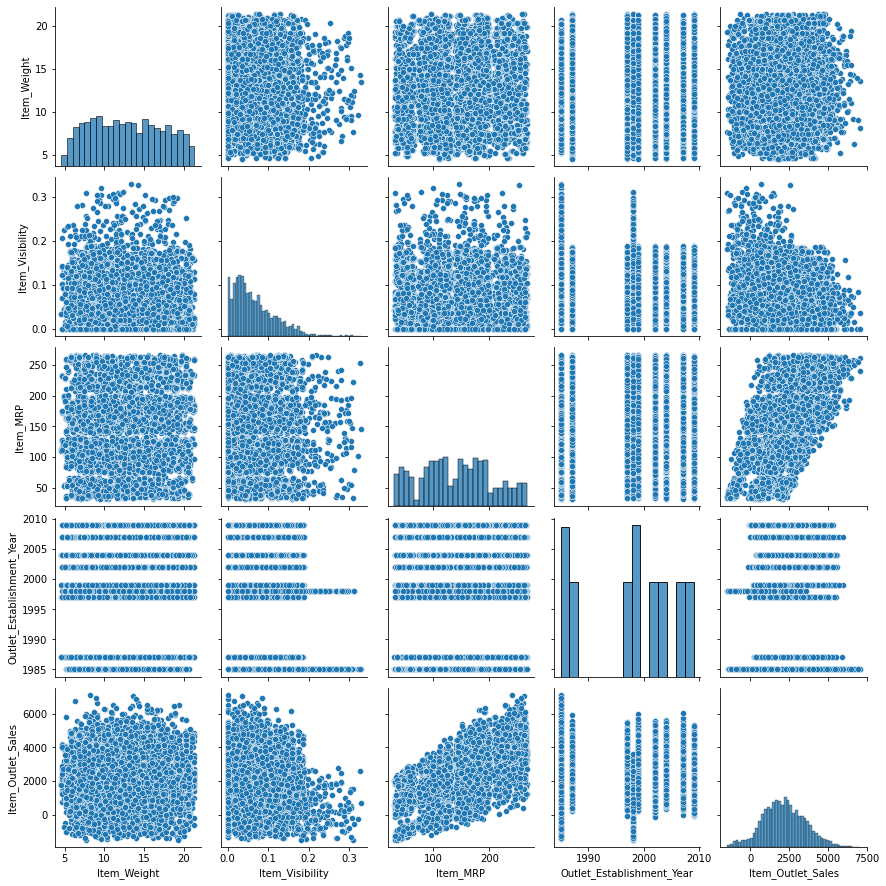

In [57]:
sns.pairplot(df)

###*De las caracteristicas numéricas se van a tomar las siguientes variables:*
* Item_Weight
* Item_Visibility
* Item_MRP 

In [11]:
numerical_features = df.select_dtypes(include = [np.number]).columns
numerical_features

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

###*De las caracteristicas categoricas se van a tomar las siguientes variables:*
* Item_Fat_Content
* Item_Type
* Outlet_Identifier
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

In [12]:
categorical_features = df.select_dtypes(include = [np.object]).columns
categorical_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [15]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [16]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [18]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [39]:
X = df.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [34]:
df.drop(labels='Item_Identifier', axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,5358.381836
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,380.589844
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,1938.599121
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,1191.627441
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,988.485352
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,3488.122070
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,2522.586914
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1147.426758
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1765.972656


In [48]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'],['Low Fat','Low Fat'])
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],['Regular'])

In [49]:
X_var = df.drop(['Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'], axis = 'columns').columns
X = df.loc[:, X_var]

In [50]:
X = pd.get_dummies(X)

In [51]:
X

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [52]:
X.shape

(8523, 31)

In [53]:
Y = df.loc[:, ['Item_Outlet_Sales']]

##**Regresión lineal**

In [59]:
# Definir modelo
ols = LinearRegression(fit_intercept=True)

# Estimar modelo
ols.fit(X, Y)

LinearRegression()

**Información del modelo**

In [73]:
print("Intercept:", ols.intercept_)
print("Coeficiente:", list(zip(X.columns, ols.coef_.flatten(), )))


Intercept: [-68.98964786]
Coeficiente: [('Item_Weight', 0.19580786723417679), ('Item_Visibility', -299.2505813647979), ('Item_MRP', 15.562954594672332), ('Item_Fat_Content_Low Fat', -20.45214597395029), ('Item_Fat_Content_Regular', 20.452145973952515), ('Item_Type_Baking Goods', -6.3357874231283375), ('Item_Type_Breads', -3.3377979758845737), ('Item_Type_Breakfast', 4.536502704130621), ('Item_Type_Canned', 19.717194343066947), ('Item_Type_Dairy', -46.13352757534682), ('Item_Type_Frozen Foods', -32.40416929201534), ('Item_Type_Fruits and Vegetables', 23.08710102045248), ('Item_Type_Hard Drinks', -5.37183931965493), ('Item_Type_Health and Hygiene', -16.763658750806893), ('Item_Type_Household', -45.67042790576007), ('Item_Type_Meat', -4.156675961509144), ('Item_Type_Others', -32.42519336641964), ('Item_Type_Seafood', 175.6922105047758), ('Item_Type_Snack Foods', -15.99041518595335), ('Item_Type_Soft Drinks', -32.5619008958324), ('Item_Type_Starchy Foods', 18.118385079886558), ('Outlet_Siz

**Bondad de ajuste**

In [74]:
print("Coeficiente de determinación R^2:", ols.score(X, Y))

Coeficiente de determinación R^2: 0.8744183652109241


El modelo puede explicar el 87.44% de la variabilidad observada en la variable de ventas.

In [66]:
predicciones=ols.predict(X)

In [71]:
rmse = mean_squared_error(
        y_true  = Y,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 485.0886818229497


Se deben probar más especificaciones para ver si se logra un modelo con un error más bajo.

Para mejorar el modelo se puede hacer distintas pruebas ingresando y sacando las variables explicativas. Dentro de las pruebas de bondad de ajuste se deben evaluar los distintos estadisticos como R2, RMSE. y pruebas F para significancia conjunta.


In [79]:
print("Coeficiente:", list(zip(X.columns, ols.coef_.flatten(), )))

Coeficiente: [('Item_Weight', 0.19580786723417679), ('Item_Visibility', -299.2505813647979), ('Item_MRP', 15.562954594672332), ('Item_Fat_Content_Low Fat', -20.45214597395029), ('Item_Fat_Content_Regular', 20.452145973952515), ('Item_Type_Baking Goods', -6.3357874231283375), ('Item_Type_Breads', -3.3377979758845737), ('Item_Type_Breakfast', 4.536502704130621), ('Item_Type_Canned', 19.717194343066947), ('Item_Type_Dairy', -46.13352757534682), ('Item_Type_Frozen Foods', -32.40416929201534), ('Item_Type_Fruits and Vegetables', 23.08710102045248), ('Item_Type_Hard Drinks', -5.37183931965493), ('Item_Type_Health and Hygiene', -16.763658750806893), ('Item_Type_Household', -45.67042790576007), ('Item_Type_Meat', -4.156675961509144), ('Item_Type_Others', -32.42519336641964), ('Item_Type_Seafood', 175.6922105047758), ('Item_Type_Snack Foods', -15.99041518595335), ('Item_Type_Soft Drinks', -32.5619008958324), ('Item_Type_Starchy Foods', 18.118385079886558), ('Outlet_Size_High', -20.4222533769095

Las variables que están asociadas a mas ventas son:
**Item_Weight**
**Item_MRP** 
**Item_Fat_content:** Regular 
**Item_Type:** Breakfast, Canned, Fruits and Vegetables, Seafood, Starchy Foods 
**Outlet Size:** small
**Outlet_Type_Tier:** tier 2 y 3 
**Outlet_Type_Supermarket:** Type 1 y Type 3 

##**KNN Regresion**

In [87]:
#Crear instancia del modelo
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(X,Y)

KNeighborsRegressor(n_neighbors=4)

In [88]:
#Y predicho
y_pred = knn.predict(X)

In [89]:
#score
knn.score(X,Y)

0.8219767440887272

La variacion de las ventas está explicado en un 82% por las variables explicativas.

En general los dos modelos arrojan que estas variables tienen un buen ajuste a la variacion de las ventas